In [2]:
class SLR_MODEL:

    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        
        return self.m * X_test + self.b

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("tv_sales.csv")

In [5]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [6]:
df.shape

(200, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [9]:
#TV : The amount spent on TV advertising (in thousands of dollars)
#Sales : The resulting sales volume (in thousands of units)

Text(0, 0.5, 'Sales:resulting sales volume')

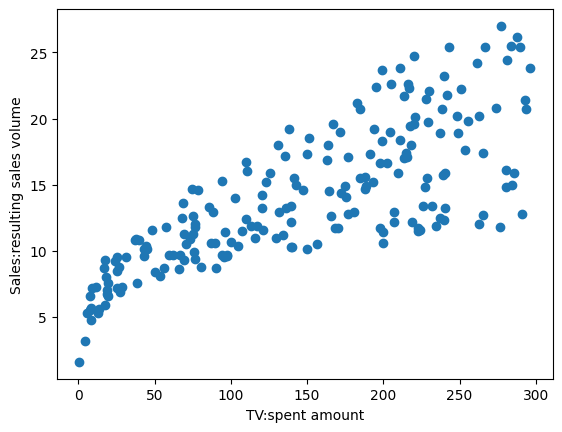

In [10]:
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('TV:spent amount')
plt.ylabel('Sales:resulting sales volume')

In [11]:
x=df.iloc[:,0:1].values
y=df.iloc[:,-1].values

In [12]:
print(x.shape,y.shape)

(200, 1) (200,)


In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2) 

In [14]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(160, 1) (40, 1) (160,) (40,)


In [15]:
slr=SLR_MODEL()

In [16]:
slr.fit(X_train,y_train)

[0.05245828]
[6.56652461]


In [17]:
y_pred=slr.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))
print("r2_score :",r2_score(y_test,y_pred))

MAE : 3.2353682995006396
MSE : 17.792893505799913
r2_score : 0.042179776427879845


Text(0, 0.5, 'Sales:resulting sales volume')

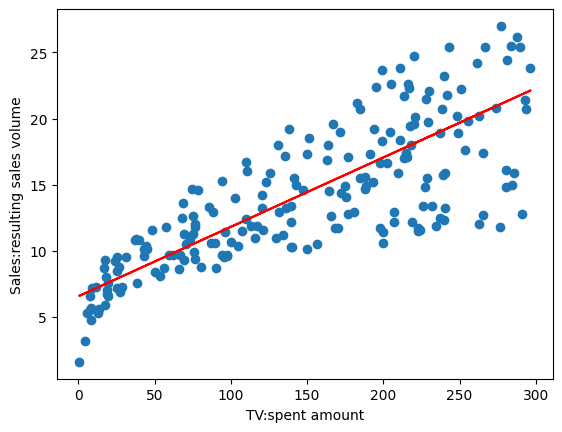

In [19]:
plt.scatter(df['TV'],df['Sales'])
plt.plot(X_train,slr.predict(X_train),color='red')
plt.xlabel('TV:spent amount')
plt.ylabel('Sales:resulting sales volume')